# Importación de librerías

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

from src.image_processing_functions import *
from src.utility_functions import *

# Detección en cada imagen
Obtener una detección del logo en cada imagen sin falsos positivos

In [2]:
template_path = 'template/pattern.png'
images_directory = 'images'

A continuación, se leen todas las imágenes mediante la función [read_images_from_directory](src/utility_functions.py) y se obtiene una detección de cada imagen mediante la función [detect_single_logo_in_image](src/image_processing_functions.py). Esta función recibe una imagen, un template y muestra la detección del template en la imagen con un nivel de confianza determinado.

Median value: 74.0, lower: 10, upper: 250
Template height ratio: 0.29264214046822745
Template width ratio: 0.5006257822277848
Best scale: 0.2
Best matching score: 0.2931707799434662


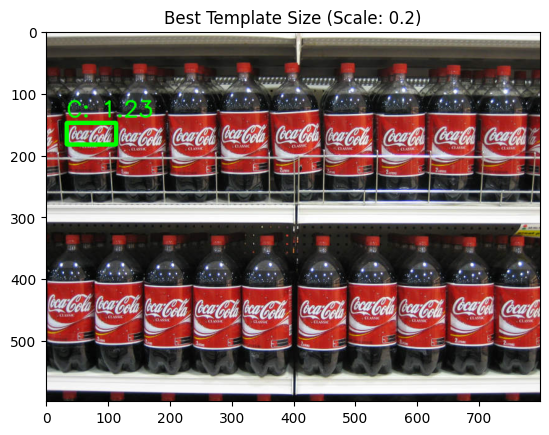

Median value: 83.0, lower: 300, upper: 450
Template height ratio: 0.40792540792540793
Template width ratio: 0.5594405594405595
Best scale: 0.5
Best matching score: 0.2295190691947937


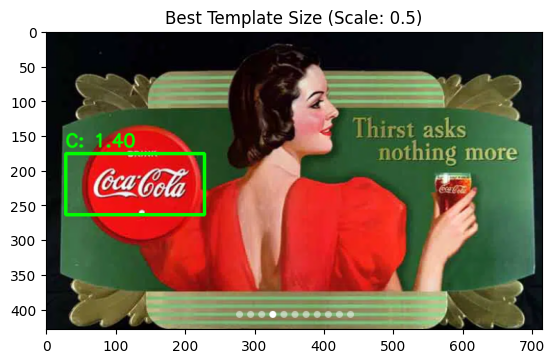

Median value: 94.0, lower: 300, upper: 450
Template height ratio: 0.35
Template width ratio: 1.932367149758454
Best scale: 0.5
Best matching score: 0.16821308434009552


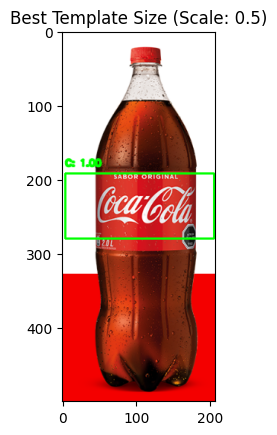

High contrast image
Median value: 224.0, lower: 100, upper: 540
Template height ratio: 0.35496957403651114
Template width ratio: 0.5594405594405595
Best scale: 1.3421052631578947
Best matching score: 0.14974960684776306


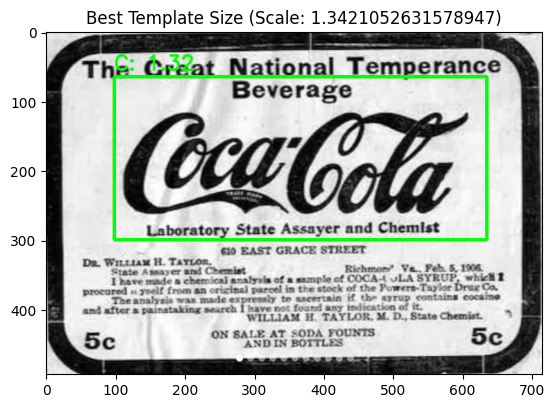

Median value: 41.0, lower: 10, upper: 250
Template height ratio: 0.3888888888888889
Template width ratio: 0.5822416302765647
Best scale: 0.763157894736842
Best matching score: 0.21383625268936157


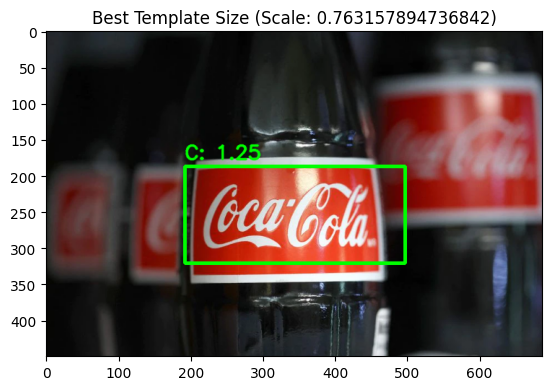

Median value: 80.0, lower: 300, upper: 450
Template height ratio: 0.4820936639118457
Template width ratio: 1.7167381974248928
Best scale: 0.5526315789473684
Best matching score: 0.18192866444587708


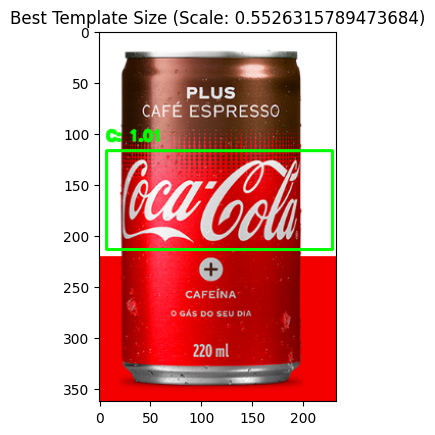

Median value: 92.0, lower: 300, upper: 450
Template height ratio: 0.1259899208063355
Template width ratio: 0.28797696184305255
Best scale: 3.1578947368421053
Best matching score: 0.08287764340639114


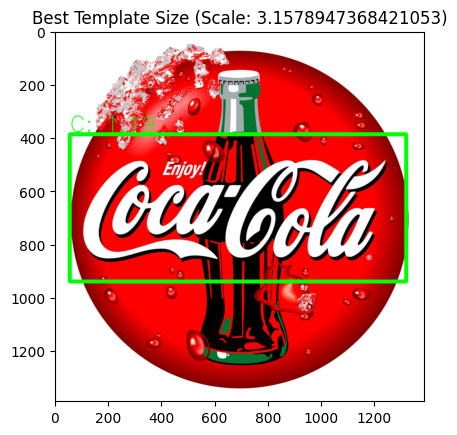

In [4]:
# Read images from the directory
images = read_images_from_directory(images_directory)

for img_path in images:
    # Detect the logo in the current image
    detect_single_logo_in_image(img_path, template_path)

El nivel de confianza se calculó mediante la función [calculate_confidence_level](src/utility_functions.py) que recibe una lista de scores, junto con el mejor score. El nivel de confianza se calcula como la relación entre el mejor score y el percentil 90, proporcionando una medida de que tan superior es el mejor score en comparación con la mayoría de los scores obtenidos.

Siendo el niveles de confianza cercanos o iguales a 1, se considera que la detección es correcta. Mayores a 1, se considera que la detección es muy buena. Menores a 1, se considera que la detección es mala.

# Múltiples detecciones en una imagen

Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1

A continuación, se obtiene una detección de múltiples logos en la imagen coca_multi.png mediante la función [detect_multiple_logo_in_image](src/image_processing_functions.py). Esta función recibe una imagen, un template y muestra la detección de múltiples logos en la imagen con un nivel de confianza global calculado como el promedio de los niveles de confianza de cada una de las detecciones que pasaron el umbral de confianza.

Esta función busca la escala de template que tenga el score mayor al hacer match con la imagen. Luego se realiza el reescalado de la imagen, se realiza el mismo preprocesamiento y se obtiene la detección de múltiples logos en la imagen. Finalmente, como varios de los logos estan superpuestos, se realiza un proceso de non-maximum suppression, mediante la función [non_max_suppression](src/image_processing_functions.py), para eliminar las detecciones que se superponen.

Median value: 74.0, lower: 10, upper: 250
Template height ratio: 0.29264214046822745
Template width ratio: 0.5006257822277848
Best scale: 0.2


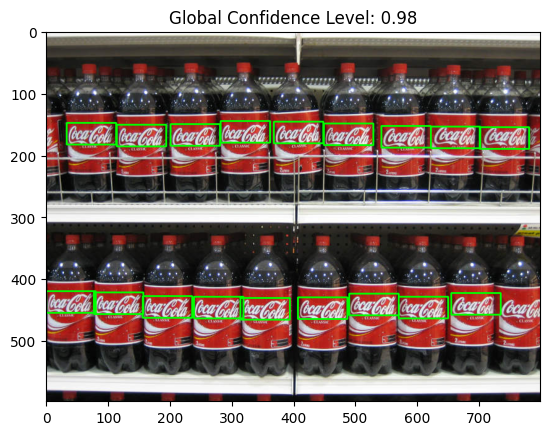

In [2]:
image_path = 'images/coca_multi.png'
template_path = 'template/pattern.png'

detect_multiple_logo_in_image(image_path, template_path)

Se puede ver que el algoritmo detecta correctamente los logos en la imagen coca_multi.png, con un nivel de confianza global de 0.98. Dado que es un valor cercano de 1, se considera que la detección es correcta.

# Generalización del algoritmo de detección

Generalizar el algoritmo del item 2 para todas las imágenes.

Median value: 74.0, lower: 10, upper: 250
Template height ratio: 0.29264214046822745
Template width ratio: 0.5006257822277848
Best scale: 0.2


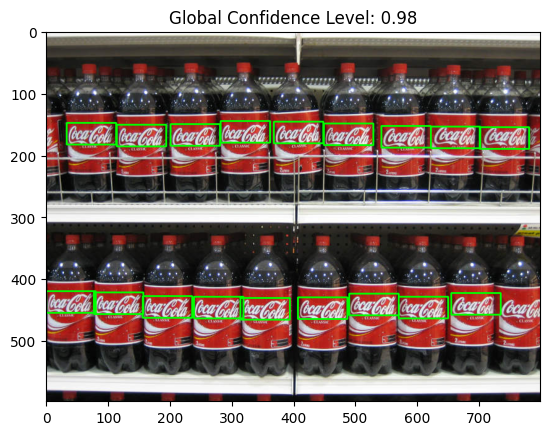

Median value: 83.0, lower: 300, upper: 450
Template height ratio: 0.40792540792540793
Template width ratio: 0.5594405594405595
Best scale: 0.5


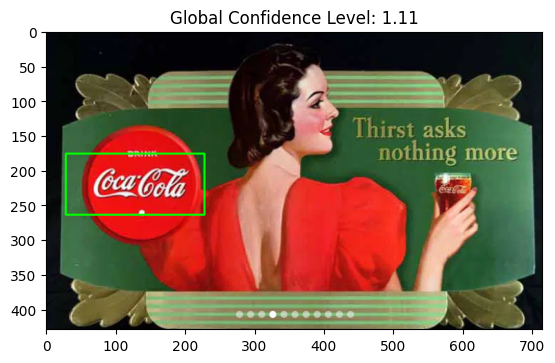

Median value: 94.0, lower: 300, upper: 450
Template height ratio: 0.35
Template width ratio: 1.932367149758454
Best scale: 0.5


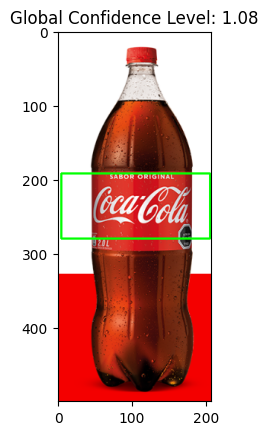

High contrast image
Median value: 224.0, lower: 100, upper: 540
Template height ratio: 0.35496957403651114
Template width ratio: 0.5594405594405595
Best scale: 1.3421052631578947


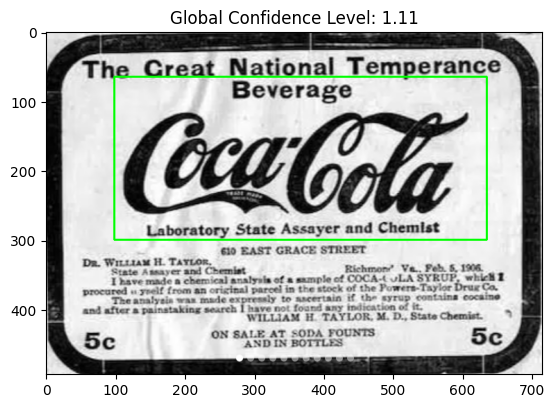

Median value: 41.0, lower: 10, upper: 250
Template height ratio: 0.3888888888888889
Template width ratio: 0.5822416302765647
Best scale: 0.763157894736842


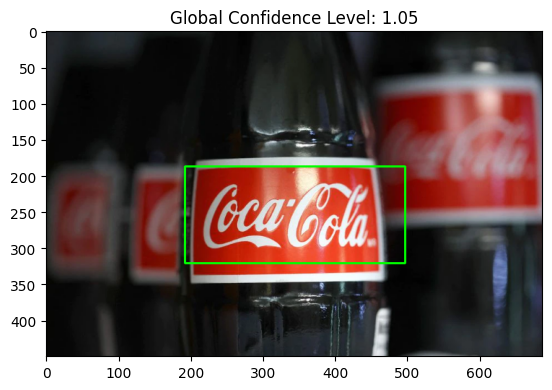

Median value: 80.0, lower: 300, upper: 450
Template height ratio: 0.4820936639118457
Template width ratio: 1.7167381974248928
Best scale: 0.5526315789473684


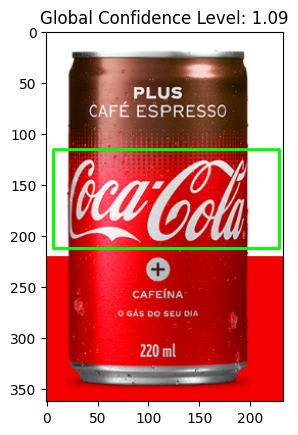

Median value: 92.0, lower: 300, upper: 450
Template height ratio: 0.1259899208063355
Template width ratio: 0.28797696184305255
Best scale: 3.1578947368421053


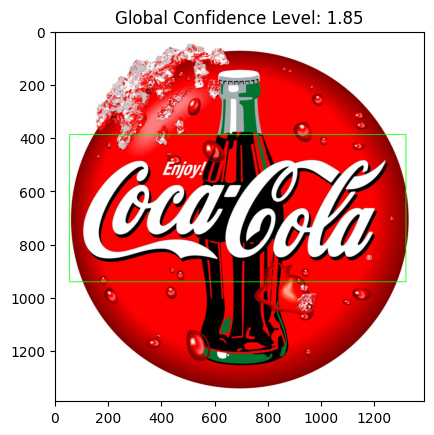

In [3]:
template_path = 'template/pattern.png'
images_directory = 'images'

# Read images from the directory
images = read_images_from_directory(images_directory)

for img_path in images:
    # Detect the logo in the current image
    detect_multiple_logo_in_image(img_path, template_path)

Como se puede ver en las imágenes, el algoritmo detecta correctamente los logos en las imágenes, con un nivel de confianza mayor a 1 para los logos individuales y un nivel de confianza global cercano a 1 para los logos múltiples. Dado que la misma función se utiliza para detectar los logos en todas las imágenes, se considera que el algoritmo es generalizable.